## Chronic Kidney Disease 

### Purpose of Analysis

This dataset can be used to predict chronic kidney disease and it has been collected at a hospital for a period of nearly 2 months.

(a) Identify the factors causing the chronic kidney disease.  
(b) Build a model that can help to determine if a patient is suffering from chronic kidney disease or not.



#### Notebook Initialization

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import scipy as scipy
import matplotlib as matplot
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 4)
np.random.seed(2021)

#### NOTE:
This notebook uses the below mentioned versions of the following libraries.  
So please have your libraries updated in order to execute this notebook.

In [2]:
print("numpy:", np.__version__)
print("pandas:", np.__version__)
print("seaborn:", sns.__version__)
print("sklearn:", sk.__version__)
print("matplotlib:", matplot.__version__)
print("scipy:", scipy.__version__)

numpy: 1.19.5
pandas: 1.19.5
seaborn: 0.11.1
sklearn: 0.24.0
matplotlib: 3.3.3
scipy: 1.6.0


#### Read the dataset

In [3]:
chronic_kidney_diease_original_dataframe = pd.read_csv("KidneyChronic.csv")
df = chronic_kidney_diease_original_dataframe.copy()

#### Feature Description
    age     numerical (Age in years)
    bp      numerical (Blood Pressure in mm/Hg)
    sg      nominal   (Specific Gravity {1.005, 1.010, 1.015, 1.020, 1.025})
    al      nominal   (Albumin {0, 1, 2, 3, 4, 5})
    su      nominal   (Sugar {0, 1, 2, 3, 4, 5})
    rbc     nominal   (Red Blood Cells {normal, abnormal})
    pc      nominal   (Pus Cell {normal, abnormal})
    pcc     nominal   (Pus Cell Clumps {present, notpresent})
    ba      nominal   (Bacteria {present, notpresent})
    bgr     numerical (Blood Glucose Random in mgs/dl)
    bu      numerical (Blood Urea in mgs/dl)
    sc      numerical (Serum Creatinine in mgs/dl)
    sod     numerical (Sodium in mEq/L)
    pot     numerical (Potassium in mEq/L)
    hemo    numerical (Hemoglobin in gms)
    pcv     numerical (Packed Cell Volume)
    wbcc    numerical (White Blood Cells Count in cells/cumm)
    rbcc    numerical (Red Blood Cells Count in millions/cmm)
    htn     nominal   (Hypertension {yes, no})
    dm      nominal   (Diabetes Mellitus {yes, no})
    cad     nominal   (Coronary Artery Disease {yes, no})
    appet   nominal   (Appetite {good, poor})
    pe      nominal   (Pedal Edema {yes, no})
    ane     nominal   (Anemia {yes, no})
    class   nominal   (Class {ckd, notckd})

### Exploratory Data Analysis

In [4]:
print("df.shape:", df.shape)
# We have 25 attributes and 400 records in our dataset
print()
print(df.info())
# Here we can observe that all the attributes are of object type (which needs to be addressed effectively)

df.shape: (400, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe   

#### OBSERVATIONS:
The given datset has 25 columns including the target label and 400 records.  
Also there are no missing values, but there can be incompatible values which should be treated as missing values.  
All the columns are of object type, so we have to change the data type accordingly to make them compatible for the analysis.

### Data Exploration
Lets see the unique values for all the features present in the dataset

In [5]:
# Lets look at the first 10 records of the dataset
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48,7,62,48,51,60,68,24,52,53
bp,80,50,80,70,80,90,70,?,100,90
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
al,1,4,2,4,2,3,0,2,3,2
su,0,0,3,0,0,0,0,4,0,0
rbc,?,?,normal,normal,normal,?,?,normal,normal,abnormal
pc,normal,normal,normal,abnormal,normal,?,normal,abnormal,abnormal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121,?,423,117,106,74,100,410,138,70


#### OBSERVATIONS:
We can clearly see that the given dataset has incompatible values ('?') for most of the attributes.  
Also, we have some altered values as well, like ['\tno', '\tyes', ' yes'].  
So lets address this issue first by converting all such values with np.nan.

In [6]:
df = df.replace('?', np.nan)      # replaces all the instances of '?' with the NaN
df = df.replace('\t?', np.nan)    # replaces all the instances of '\t?' with the NaN (pcv attribute)
df = df.replace('\tno', 'no')
df = df.replace('\tyes', 'yes')
df = df.replace(' yes', 'yes')

# Lets see what's the converted types are for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     329 non-null    object
 16  wbcc    294 non-null    object
 17  rbcc    269 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    ob

#### OBSERVATIONS:
1. All the attributes are of object type.
   - we need to convert/transform them into suitable types for further analysis
2. There are various attributes which have so many missing data.
   - we need to address this issue appropriately

#### Data Types Conversion
Lets convert the datatypes for each attribute in order to proceed with further EDA.

In [7]:
df['age'] = df['age'].astype('float64')
df['bp'] = df['bp'].astype('float64')
df['sg'] = df['sg'].astype('category')
df['al'] = df['al'].astype('category')
df['su'] = df['su'].astype('category')

df['rbc'] = df['rbc'].astype('category')
df['pc'] = df['pc'].astype('category')
df['pcc'] = df['pcc'].astype('category')
df['ba'] = df['ba'].astype('category')
df['bgr'] = df['bgr'].astype('float64')

df['bu'] = df['bu'].astype('float64')
df['sc'] = df['sc'].astype('float64')
df['sod'] = df['sod'].astype('float64')
df['pot'] = df['pot'].astype('float64')
df['hemo'] = df['hemo'].astype('float64')

df['pcv'] = df['pcv'].astype('float64')
df['wbcc'] = df['wbcc'].astype('float64')
df['rbcc'] = df['rbcc'].astype('float64')
df['htn'] = df['htn'].astype('category')
df['dm'] = df['dm'].astype('category')

df['cad'] = df['cad'].astype('category')
df['appet'] = df['appet'].astype('category')
df['pe'] = df['pe'].astype('category')
df['ane'] = df['ane'].astype('category')
df['class'] = df['class'].astype('category')

Here we will rename the columns names or the attribute names of our dataset.

In [8]:
cols_names = {"bp":"blood_pressure",
              "sg":"specific_gravity",
              "al":"albumin",
              "su":"sugar",
              "rbc":"red_blood_cells",
              "pc":"pus_cell",
              "pcc":"pus_cell_clumps",
              "ba":"bacteria",
              "bgr":"blood_glucose_random",
              "bu":"blood_urea",
              "sc":"serum_creatinine",
              "sod":"sodium",
              "pot":"potassium",
              "hemo":"haemoglobin",
              "pcv":"packed_cell_volume",
              "wbcc":"white_blood_cell_count",
              "rbcc":"red_blood_cell_count",
              "htn":"hypertension",
              "dm":"diabetes_mellitus",
              "cad":"coronary_artery_disease",
              "appet":"appetite",
              "pe":"pedal_edema",
              "ane":"anemia",
              "class":"classification"}

df.rename(columns = cols_names, inplace = True)

# Lets see what's the converted types are for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      391 non-null    float64 
 1   blood_pressure           388 non-null    float64 
 2   specific_gravity         353 non-null    category
 3   albumin                  354 non-null    category
 4   sugar                    351 non-null    category
 5   red_blood_cells          248 non-null    category
 6   pus_cell                 335 non-null    category
 7   pus_cell_clumps          396 non-null    category
 8   bacteria                 396 non-null    category
 9   blood_glucose_random     356 non-null    float64 
 10  blood_urea               381 non-null    float64 
 11  serum_creatinine         383 non-null    float64 
 12  sodium                   313 non-null    float64 
 13  potassium                312 non-null    float64 
 14  haemoglobi

#### OBSERVATIONS:
1. Now clearly, all the attributes have been tranformed or typecasted into their respective types.
2. This would help to perform the required preprocessing on top of them.

#### Lets count the number of missing data points across the various attributes

In [9]:
df.isnull().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

#### Lets plot this information

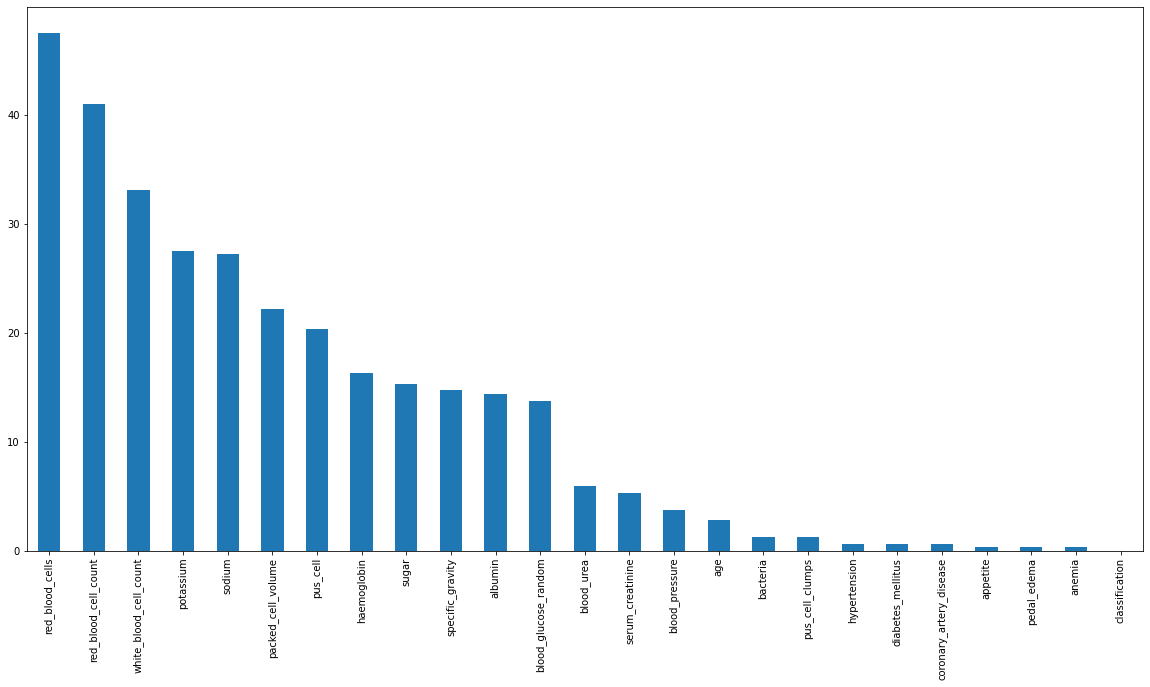

In [10]:
_ = ((df.isnull().sum()/df.shape[0])*125).sort_values(ascending=False).plot(kind='bar', figsize=(20, 10))

#### OBSERVATIONS:
Since some attributes have substantial amount of missing data, so dropping them would not be an ideal approach.  
We need to analyze the dataset more closely to see what can be done to address the missing data problem.

#### Lets analyze each attribute
Here we check for the outliers or missing values for the attribute, and then address these issues.

In [11]:
Numerical_Features = ['age', 
                      'blood_pressure', 
                      'blood_glucose_random', 
                      'blood_urea', 
                      'serum_creatinine', 
                      'sodium', 
                      'potassium', 
                      'haemoglobin', 
                      'packed_cell_volume', 
                      'white_blood_cell_count', 
                      'red_blood_cell_count']

Categorical_Features = ['specific_gravity', 
                        'albumin', 
                        'sugar', 
                        'red_blood_cells', 
                        'pus_cell', 
                        'pus_cell_clumps', 
                        'bacteria', 
                        'hypertension', 
                        'diabetes_mellitus', 
                        'coronary_artery_disease', 
                        'appetite', 
                        'pedal_edema', 
                        'anemia', 
                        'classification']
    

#### Checking Features Distribution for Numerical Features

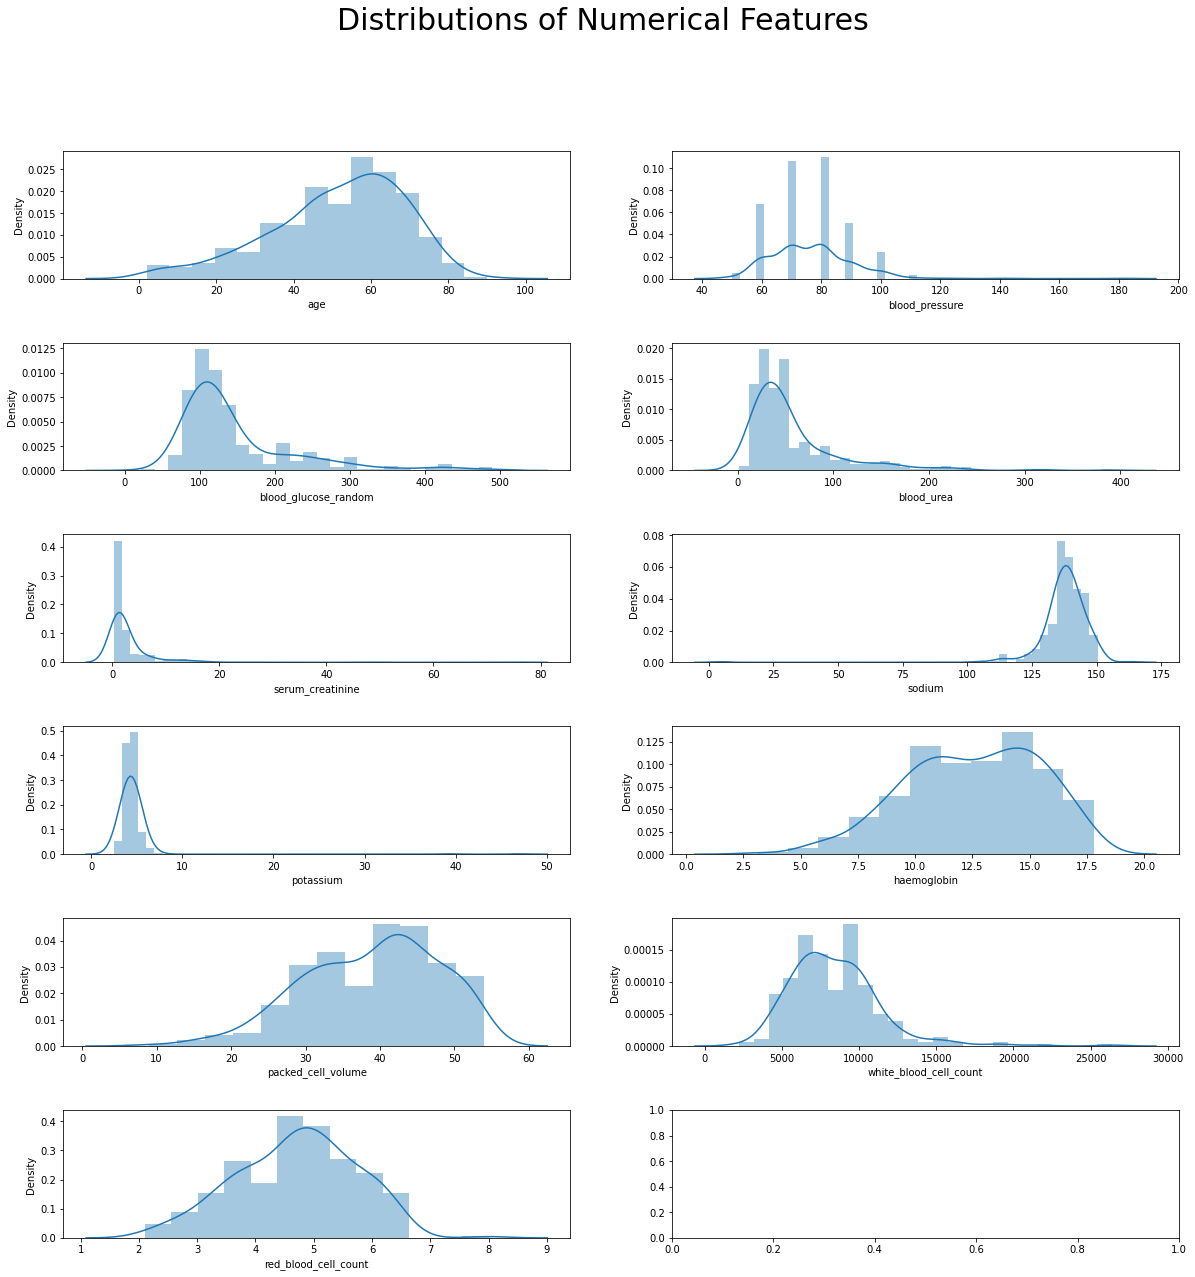

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,20))
_ = fig.subplots_adjust(hspace=0.5)
_ = fig.suptitle('Distributions of Numerical Features', fontsize=30)


for ax, feats in zip(axes.flatten(), Numerical_Features):
    _ = sns.distplot(a=df[feats], ax=ax)

#### OBSERVATIONS:
1. Age looks a bit left skewed.  
2. Blood Glucose Random is right skewed.  
   - we have to see if there are any outliers for this attribute
3. Blood Urea is also a bit right skewed.  
   - we have to see if there are any outliers for this attribute
4. Rest of the features are lightly skewed.

#### Approach for handling the missing values for numerical attributes  
Since the target label has no missing data, so we can find out the mean of the numerical attributes corresponding to each class,  and then can replace the missing data with that mean value altogether.

In [13]:
def replace_with_mean_per_class(attr):
    attr_mean_per_class = df.loc[:, [attr, 'classification']].groupby(by=['classification']).mean()
    attr_and_class = df.loc[:, [attr, 'classification']]
    attr_and_class[attr] = np.where(attr_and_class['classification'] == 'ckd', 
                                attr_and_class[attr].fillna(attr_mean_per_class.loc[0, attr]),
                                attr_and_class[attr].fillna(attr_mean_per_class.loc[1, attr]))
    df[attr] = attr_and_class[attr]

#### Look for Outliers into the blood_pressure attribute

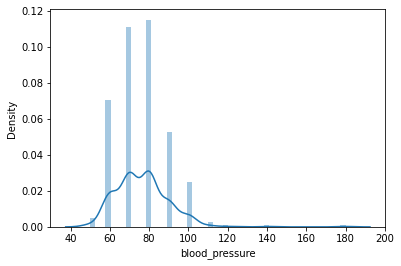

In [14]:
_ = sns.distplot(df['blood_pressure'], bins=50, kde=True)

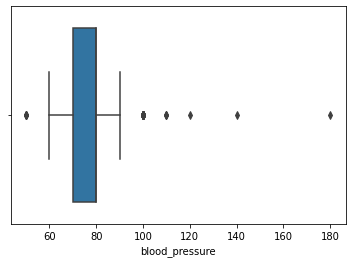

In [15]:
_ = sns.boxplot(x=df['blood_pressure'])

#### OBSERVATIONS:
1. There are a few outliers here, so we can remove them and will treat them as missing values.
   - We can ignore the values which are beyond the lower and upper whiskers

In [16]:
bp_Q1 = df['blood_pressure'].quantile(0.25)
bp_Q3 = df['blood_pressure'].quantile(0.75)
bp_IQR = bp_Q3 - bp_Q1
bp_Lower_Whisker = bp_Q1 - 1.5*bp_IQR
bp_Upper_Whisker = bp_Q3 + 1.5*bp_IQR

bp_new = df.blood_pressure[df['blood_pressure'] < bp_Upper_Whisker]
df['blood_pressure'] = bp_new[bp_new > bp_Lower_Whisker]

_ = replace_with_mean_per_class('blood_pressure')

#### Look for Outliers into the blood_glucose_random attribute

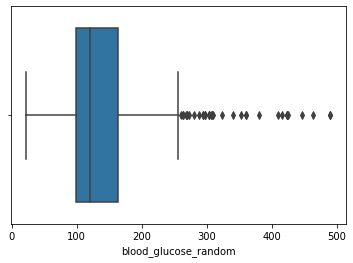

In [17]:
_ = sns.boxplot(x=df['blood_glucose_random'])

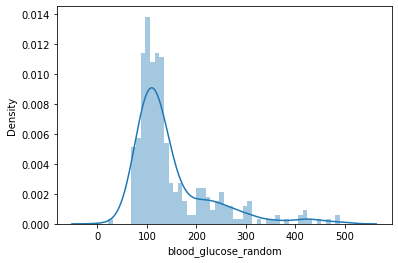

In [18]:
_ = sns.distplot(df['blood_glucose_random'], bins=50, kde=True)

#### OBSERVATIONS:
1. blood_glucose_random attribute is positively skewed
2. There are a few outliers as well, so we can remove them and will treat them as missing values

In [19]:
bgr_Q1 = df['blood_glucose_random'].quantile(0.25)
bgr_Q3 = df['blood_glucose_random'].quantile(0.75)
bgr_IQR = bgr_Q3 - bgr_Q1
bgr_Lower_Whisker = bgr_Q1 - 1.5*bgr_IQR
bgr_Upper_Whisker = bgr_Q3 + 1.5*bgr_IQR

df['blood_glucose_random'] = df.blood_glucose_random[df['blood_glucose_random'] < bgr_Upper_Whisker]
_ = replace_with_mean_per_class('blood_glucose_random')

#### Look for Outliers into the blood_urea attribute

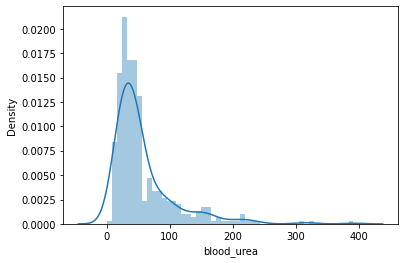

In [20]:
_ = sns.distplot(df['blood_urea'], bins=50, kde=True)

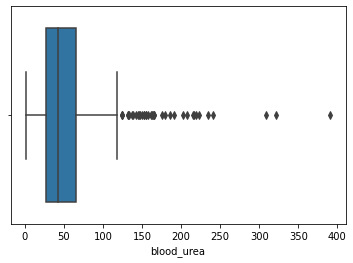

In [21]:
_ = sns.boxplot(x=df['blood_urea'])

#### OBSERVATIONS:
1. blood_urea attribute has a few outliers, precisely beyond the point 125.
2. So, lets trim the values which are beyond the upper whisker for the blood_urea attribute

In [22]:
bgr_Q1 = df['blood_urea'].quantile(0.25)
bgr_Q3 = df['blood_urea'].quantile(0.75)
bgr_IQR = bgr_Q3 - bgr_Q1
bgr_Lower_Whisker = bgr_Q1 - 1.5*bgr_IQR
bgr_Upper_Whisker = bgr_Q3 + 1.5*bgr_IQR

df['blood_urea'] = df.blood_glucose_random[df['blood_urea'] < bgr_Upper_Whisker]
_ = replace_with_mean_per_class('blood_urea')

#### OBSERVATIONS:
The rest of the attributes do not have outliers, so we will simply replace the missing values for those attributes with the mean corresponding to their class label.  
1. age
2. serum_creatinine
3. sodium
4. potassium
5. haemoglobin
6. packed_cell_volume
7. white_blood_cell_count
8. red_blood_cell_count

In [23]:
_ = replace_with_mean_per_class('age')
_ = replace_with_mean_per_class("serum_creatinine")
_ = replace_with_mean_per_class('sodium')
_ = replace_with_mean_per_class('potassium')

_ = replace_with_mean_per_class('haemoglobin')
_ = replace_with_mean_per_class('packed_cell_volume')
_ = replace_with_mean_per_class('white_blood_cell_count')
_ = replace_with_mean_per_class('red_blood_cell_count')

#### Lets describe and find the Correlation for the numerical attributes

In [24]:
ndf = df[Numerical_Features]
# ndf.corr()
ndf.describe()

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000,400.0000
mean,51.5321,74.5202,129.9745,128.6263,3.0852,136.8378,4.6758,12.3503,37.9633,8558.0582,4.4829
std,16.9822,9.1804,40.1697,35.5726,5.6277,9.3362,2.8219,2.8036,8.4900,2541.9104,0.9187
min,2.0000,60.0000,22.0000,22.0000,0.4000,4.5000,2.5000,3.1000,9.0000,2200.0000,2.1000
25%,42.0000,70.0000,101.0000,103.7500,0.9000,133.9018,4.0000,10.6475,32.9399,6975.0000,3.9452
50%,54.5413,76.4216,124.0000,129.5000,1.3000,136.0000,4.7000,12.1000,37.0000,9069.5364,4.1000
75%,64.0000,80.0000,143.3258,143.3258,3.0500,141.0000,4.8784,14.8000,44.0000,9400.0000,5.2000
max,90.0000,90.0000,256.0000,256.0000,76.0000,163.0000,47.0000,17.8000,54.0000,26400.0000,8.0000


#### Plot the heatmap for the numerical attributes

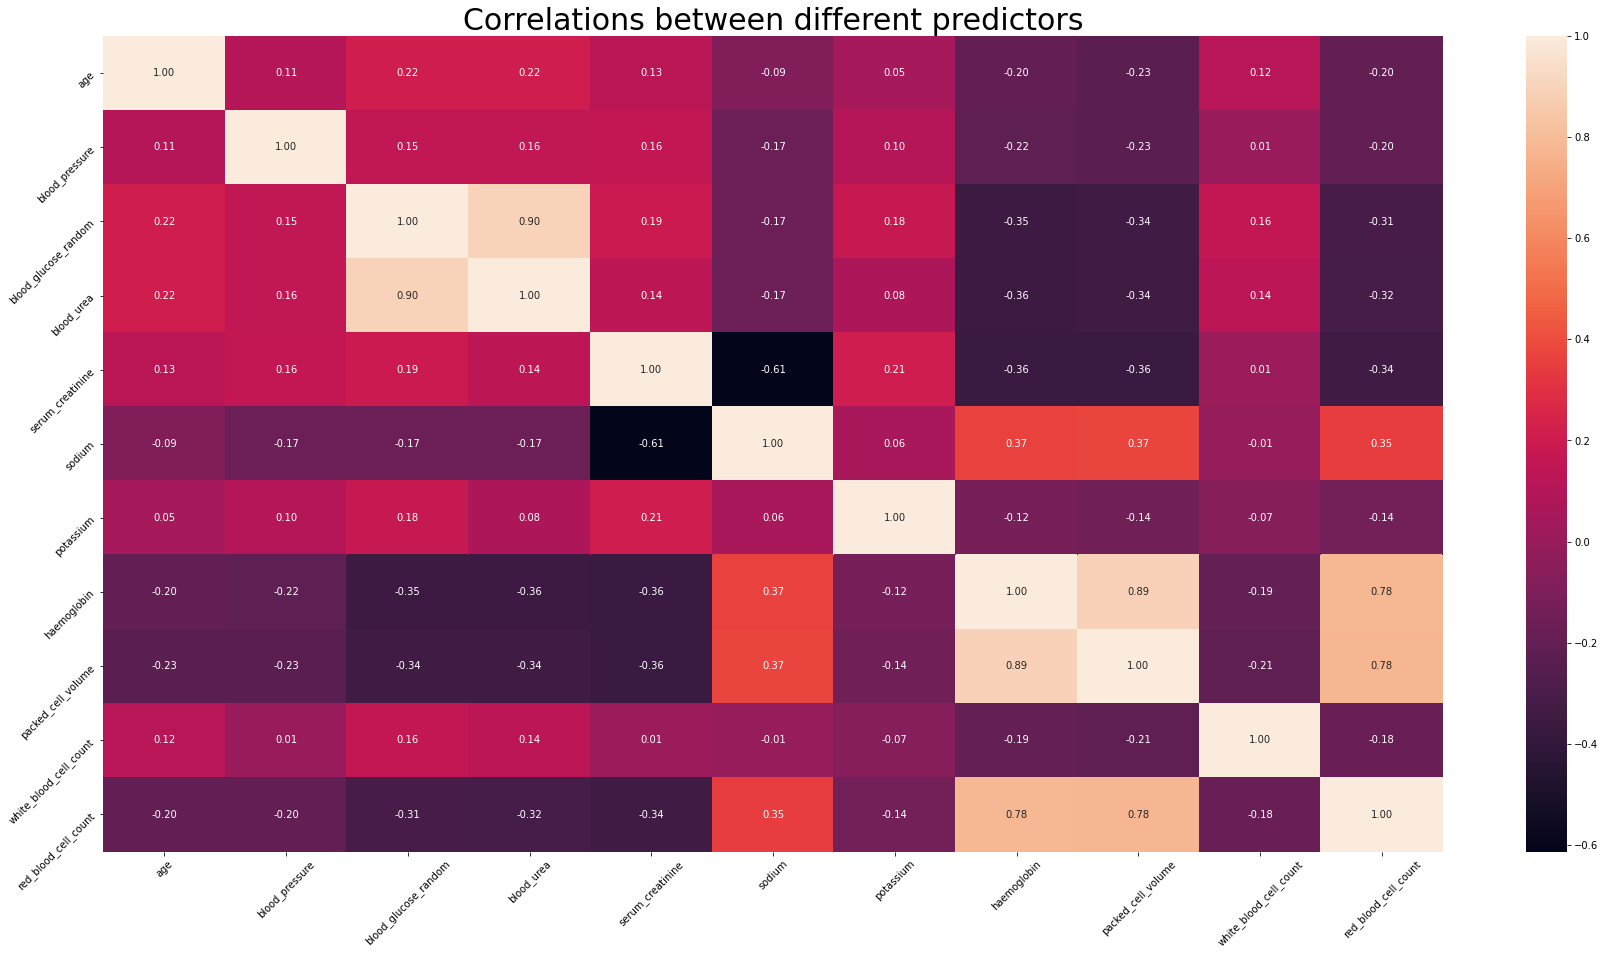

In [25]:
fig, ax = plt.subplots(figsize=(30,15))
_ = sns.heatmap(ndf.corr(), annot=True, fmt='.2f', ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors', fontsize=30)
plt.show()

#### OBSERVATIONS:
1. CORR(haemoglobin, red_blood_cell_count) = 0.78
2. CORR(packed_cell_volume, red_blood_cell_count) = 0.78
3. CORR(haemoglobin, packed_cell_volume) = 0.89
4. CORR(serum_creatinine, sodium) = -0.61
5. CORR(blood_urea, haemoglobin) = -0.55
6. CORR(blood_urea, serum_creatinine) = 0.53
7. CORR(blood_urea, blood_glucose_random) = 0.90

#### Checking Features Distribution for Categorical Features

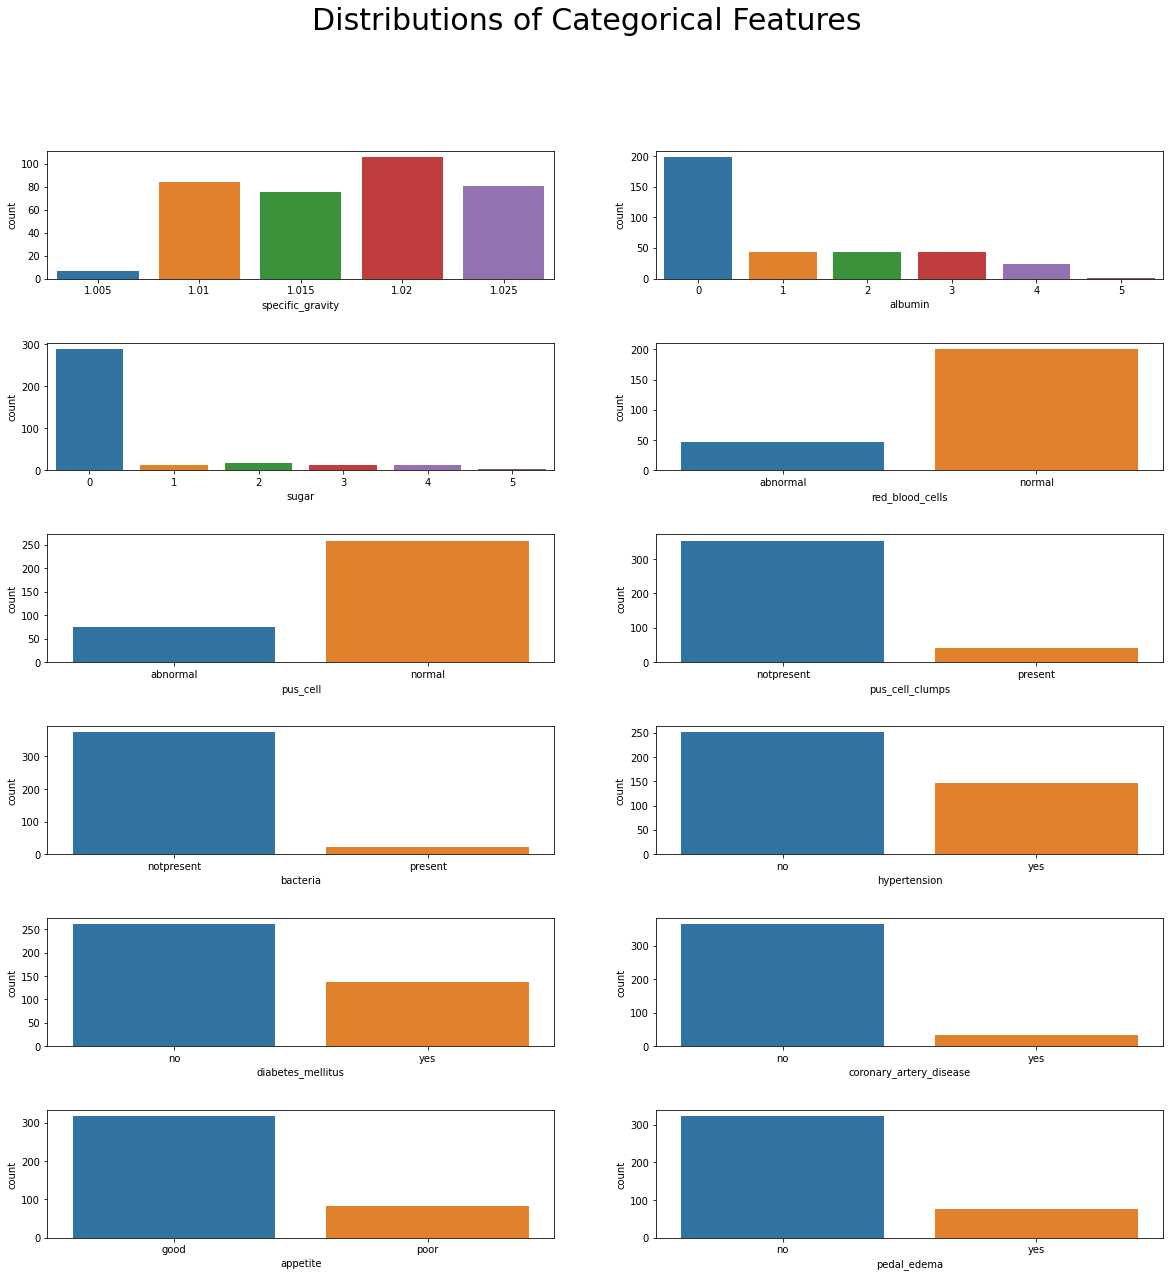

In [26]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features', fontsize=30)


for ax, feats in zip(axes.flatten(), Categorical_Features):
    sns.countplot(df[feats], ax=ax)

#### OBSERVATIONS:
A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

In [27]:
cdf = df[Categorical_Features]
# cdf.head(10).T
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   specific_gravity         353 non-null    category
 1   albumin                  354 non-null    category
 2   sugar                    351 non-null    category
 3   red_blood_cells          248 non-null    category
 4   pus_cell                 335 non-null    category
 5   pus_cell_clumps          396 non-null    category
 6   bacteria                 396 non-null    category
 7   hypertension             398 non-null    category
 8   diabetes_mellitus        398 non-null    category
 9   coronary_artery_disease  398 non-null    category
 10  appetite                 399 non-null    category
 11  pedal_edema              399 non-null    category
 12  anemia                   399 non-null    category
 13  classification           400 non-null    category
dtypes: categor

#### OBSERVATIONS:
1. Like the numerical attributes, categorical attributes too have missing data.
2. Since the classification attribute has no missing values, we can use that to address the missing data problem.

#### Approach for handling the missing values for categorical attributes  
Since the target label has no missing data, so we can find out the mode of the categorical attributes corresponding to each class,  and then can replace the missing data with that mean value altogether.

In [28]:
def replace_categorical_missing_values_with_mode(attr):
    attr_cls = cdf.loc[:, [attr, 'classification']]
    attr_cls_ckd_mode = attr_cls[attr_cls['classification'] == 'ckd'].mode()
    attr_cls_notckd_mode = attr_cls[attr_cls['classification'] == 'notckd'].mode()
    attr_modified = attr_cls.groupby('classification')[attr].transform(lambda x: x.fillna(x.mode()[0]))
    cdf[attr] = attr_modified

In [29]:
replace_categorical_missing_values_with_mode('specific_gravity')
replace_categorical_missing_values_with_mode('albumin')
replace_categorical_missing_values_with_mode('sugar')
replace_categorical_missing_values_with_mode('red_blood_cells')

replace_categorical_missing_values_with_mode('pus_cell')
replace_categorical_missing_values_with_mode('pus_cell_clumps')
replace_categorical_missing_values_with_mode('bacteria')
replace_categorical_missing_values_with_mode('hypertension')

replace_categorical_missing_values_with_mode('diabetes_mellitus')
replace_categorical_missing_values_with_mode('coronary_artery_disease')
replace_categorical_missing_values_with_mode('appetite')
replace_categorical_missing_values_with_mode('anemia')
replace_categorical_missing_values_with_mode('pedal_edema')

cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   specific_gravity         400 non-null    category
 1   albumin                  400 non-null    category
 2   sugar                    400 non-null    category
 3   red_blood_cells          400 non-null    category
 4   pus_cell                 400 non-null    category
 5   pus_cell_clumps          400 non-null    category
 6   bacteria                 400 non-null    category
 7   hypertension             400 non-null    category
 8   diabetes_mellitus        400 non-null    category
 9   coronary_artery_disease  400 non-null    category
 10  appetite                 400 non-null    category
 11  pedal_edema              400 non-null    category
 12  anemia                   400 non-null    category
 13  classification           400 non-null    category
dtypes: categor

### Lets merge the two modified datasets together  
Here the idea is to merge the following dataframes:
- ndf (Numerical Features of the dataset)
- cdf (Categorical Features of the dataset)

In [30]:
ndf.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48.0000,7.0000,62.0000,48.0,51.0000,60.0,68.0000,24.0000,52.0000,53.0
blood_pressure,80.0000,76.4216,80.0000,70.0,80.0000,90.0,70.0000,76.4216,76.4216,90.0
blood_glucose_random,121.0000,143.3258,143.3258,117.0,106.0000,74.0,100.0000,143.3258,138.0000,70.0
blood_urea,121.0000,143.3258,143.3258,117.0,106.0000,74.0,100.0000,143.3258,138.0000,70.0
serum_creatinine,1.2000,0.8000,1.8000,3.8,1.4000,1.1,24.0000,1.1000,1.9000,7.2
sodium,133.9018,133.9018,133.9018,111.0,133.9018,142.0,104.0000,133.9018,133.9018,114.0
potassium,4.8784,4.8784,4.8784,2.5,4.8784,3.2,4.0000,4.8784,4.8784,3.7
haemoglobin,15.4000,11.3000,9.6000,11.2,11.6000,12.2,12.4000,12.4000,10.8000,9.5
packed_cell_volume,44.0000,38.0000,31.0000,32.0,35.0000,39.0,36.0000,44.0000,33.0000,29.0
white_blood_cell_count,7800.0000,6000.0000,7500.0000,6700.0,7300.0000,7800.0,9069.5364,6900.0000,9600.0000,12100.0


In [31]:
cdf.head(10).T

,0,1,2,3,4,5,6,7,8,9
specific_gravity,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02
albumin,1,4,2,4,2,3,0,2,3,2
sugar,0,0,3,0,0,0,0,4,0,0
red_blood_cells,normal,normal,normal,normal,normal,normal,normal,normal,normal,abnormal
pus_cell,normal,normal,normal,abnormal,normal,normal,normal,abnormal,abnormal,abnormal
pus_cell_clumps,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present
bacteria,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent
hypertension,yes,no,no,yes,no,yes,no,no,yes,yes
diabetes_mellitus,yes,no,yes,no,no,yes,no,yes,yes,yes
coronary_artery_disease,no,no,no,no,no,no,no,no,no,no


In [32]:
chronic_kidney_diease_modified_dataframe = ndf.join(cdf)
df = chronic_kidney_diease_modified_dataframe.copy()
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48.0000,7.0000,62.0000,48.0000,51.0000,60.0000,68.0000,24.0000,52.0000,53.0000
blood_pressure,80.0000,76.4216,80.0000,70.0000,80.0000,90.0000,70.0000,76.4216,76.4216,90.0000
blood_glucose_random,121.0000,143.3258,143.3258,117.0000,106.0000,74.0000,100.0000,143.3258,138.0000,70.0000
blood_urea,121.0000,143.3258,143.3258,117.0000,106.0000,74.0000,100.0000,143.3258,138.0000,70.0000
serum_creatinine,1.2000,0.8000,1.8000,3.8000,1.4000,1.1000,24.0000,1.1000,1.9000,7.2000
sodium,133.9018,133.9018,133.9018,111.0000,133.9018,142.0000,104.0000,133.9018,133.9018,114.0000
potassium,4.8784,4.8784,4.8784,2.5000,4.8784,3.2000,4.0000,4.8784,4.8784,3.7000
haemoglobin,15.4000,11.3000,9.6000,11.2000,11.6000,12.2000,12.4000,12.4000,10.8000,9.5000
packed_cell_volume,44.0000,38.0000,31.0000,32.0000,35.0000,39.0000,36.0000,44.0000,33.0000,29.0000
white_blood_cell_count,7800.0000,6000.0000,7500.0000,6700.0000,7300.0000,7800.0000,9069.5364,6900.0000,9600.0000,12100.0000


In [33]:
# use the following code to store the modified dataframe into a csv file.
# df.to_csv ('chronic_kidney_disease_processed_dataframe.csv', index = False, header=True)

### ------------------------------------------------------------------------------------------------------------------------------------------------------

### Building the Baseline Model
1. Here we will split the entire dataset into training and testing data.
2. We will apply the following classification algorithms to build our initial models.  
    a. Logistic Regression  
    b. KNN  
    c. Decision Trees  
    d. Random Forest  

Let's see the current status of dataframe.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      400 non-null    float64 
 1   blood_pressure           400 non-null    float64 
 2   blood_glucose_random     400 non-null    float64 
 3   blood_urea               400 non-null    float64 
 4   serum_creatinine         400 non-null    float64 
 5   sodium                   400 non-null    float64 
 6   potassium                400 non-null    float64 
 7   haemoglobin              400 non-null    float64 
 8   packed_cell_volume       400 non-null    float64 
 9   white_blood_cell_count   400 non-null    float64 
 10  red_blood_cell_count     400 non-null    float64 
 11  specific_gravity         400 non-null    category
 12  albumin                  400 non-null    category
 13  sugar                    400 non-null    category
 14  red_blood_

Here, we have a problem wrt the incompatible data points.  
We need to change the categorical-data into the numeric ones, so that Logistic Regression and KNN algorithms can be applied over them.  
So let's do that now.

In [35]:
Numerical_Features = ['age', 
                      'blood_pressure', 
                      'blood_glucose_random', 
                      'blood_urea', 
                      'serum_creatinine', 
                      'sodium', 
                      'potassium', 
                      'haemoglobin', 
                      'packed_cell_volume', 
                      'white_blood_cell_count', 
                      'red_blood_cell_count']

Categorical_Features = ['specific_gravity', 
                        'albumin', 
                        'sugar', 
                        'red_blood_cells', 
                        'pus_cell', 
                        'pus_cell_clumps', 
                        'bacteria', 
                        'hypertension', 
                        'diabetes_mellitus', 
                        'coronary_artery_disease', 
                        'appetite', 
                        'pedal_edema', 
                        'anemia']

In [36]:
# select all but the target attribute
independent_features = df.iloc[:, :-1]

# now create the dummy features out of the categorical features in order to make the dataset compatible for the ML algorithms
independent_features = pd.get_dummies(independent_features, columns = Categorical_Features)

print("Shape of Independent Features:", independent_features.shape)

Shape of Independent Features: (400, 48)


Now, we have a total of 48 independent features all of them are now of numeric type.  
Let's see the first 10 of them.

In [37]:
independent_features.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,48.0000,7.0000,62.0000,48.0,51.0000,60.0,68.0000,24.0000,52.0000,53.0
blood_pressure,80.0000,76.4216,80.0000,70.0,80.0000,90.0,70.0000,76.4216,76.4216,90.0
blood_glucose_random,121.0000,143.3258,143.3258,117.0,106.0000,74.0,100.0000,143.3258,138.0000,70.0
blood_urea,121.0000,143.3258,143.3258,117.0,106.0000,74.0,100.0000,143.3258,138.0000,70.0
serum_creatinine,1.2000,0.8000,1.8000,3.8,1.4000,1.1,24.0000,1.1000,1.9000,7.2
sodium,133.9018,133.9018,133.9018,111.0,133.9018,142.0,104.0000,133.9018,133.9018,114.0
potassium,4.8784,4.8784,4.8784,2.5,4.8784,3.2,4.0000,4.8784,4.8784,3.7
haemoglobin,15.4000,11.3000,9.6000,11.2,11.6000,12.2,12.4000,12.4000,10.8000,9.5
packed_cell_volume,44.0000,38.0000,31.0000,32.0,35.0000,39.0,36.0000,44.0000,33.0000,29.0
white_blood_cell_count,7800.0000,6000.0000,7500.0000,6700.0,7300.0000,7800.0,9069.5364,6900.0000,9600.0000,12100.0


#### Standardize the dataset
It is good practice to standardize the numeric data or values before applying the algorithms on top of them.  
Here, we will perform the standardization only for the numerical features.

In [38]:
# select all the numerical attributes
numerical_independent_features = independent_features.loc[:, Numerical_Features]

# perform the standardization for the numerical attributes
sc = StandardScaler()
numerical_independent_features.iloc[:,:] = sc.fit_transform(numerical_independent_features.iloc[:,:])

# update the entire dataset
independent_features.loc[:, Numerical_Features] = numerical_independent_features

# lets see the first 10 records after the standarization
independent_features.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,-0.2082,-2.6256,0.6172,-0.2082,-0.0314,0.4993,0.9709,-1.6233,0.0276,0.0865
blood_pressure,0.5976,0.2074,0.5976,-0.4930,0.5976,1.6883,-0.4930,0.2074,0.2074,1.6883
blood_glucose_random,-0.2237,0.3328,0.3328,-0.3234,-0.5976,-1.3952,-0.7471,0.3328,0.2000,-1.4949
blood_urea,-0.2147,0.4137,0.4137,-0.3272,-0.6369,-1.5376,-0.8057,0.4137,0.2638,-1.6501
serum_creatinine,-0.3354,-0.4066,-0.2287,0.1272,-0.2998,-0.3532,3.7211,-0.3532,-0.2109,0.7321
sodium,-0.3149,-0.3149,-0.3149,-2.7709,-0.3149,0.5536,-3.5217,-0.3149,-0.3149,-2.4492
potassium,0.0719,0.0719,0.0719,-0.7720,0.0719,-0.5236,-0.2398,0.0719,0.0719,-0.3462
haemoglobin,1.0892,-0.3751,-0.9822,-0.4108,-0.2680,-0.0537,0.0178,0.0178,-0.5537,-1.0179
packed_cell_volume,0.7119,0.0043,-0.8212,-0.7033,-0.3495,0.1223,-0.2315,0.7119,-0.5853,-1.0571
white_blood_cell_count,-0.2986,-1.0076,-0.4168,-0.7319,-0.4955,-0.2986,0.2015,-0.6531,0.4104,1.3952


#### Now, at this point, we have our final dataset ready to be used with the machine learning algorithms.   
We will first split the dependent and independent attributes.

In [39]:
X = independent_features.iloc[:,:]
Y = df.iloc[:, -1]

# lets see all the independent features present in our dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          400 non-null    float64
 1   blood_pressure               400 non-null    float64
 2   blood_glucose_random         400 non-null    float64
 3   blood_urea                   400 non-null    float64
 4   serum_creatinine             400 non-null    float64
 5   sodium                       400 non-null    float64
 6   potassium                    400 non-null    float64
 7   haemoglobin                  400 non-null    float64
 8   packed_cell_volume           400 non-null    float64
 9   white_blood_cell_count       400 non-null    float64
 10  red_blood_cell_count         400 non-null    float64
 11  specific_gravity_1.005       400 non-null    uint8  
 12  specific_gravity_1.01        400 non-null    uint8  
 13  specific_gravity_1.0

#### OBSERVATIONS:
1. All the categorical attributes with their nominal values have been translated into new features of their own.


#### Lets Encode the target attribute

In [40]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

### Let's see the contribution of each feature towards the disease classification

In [41]:
# cf_freq would contain the frequency of the nominal points across all the categorical features
cf_freq = dict()

for f in Categorical_Features:
    feature_freq = df[f].value_counts().to_dict()
    for k in feature_freq:
        cf_freq[f + '_' + k] = feature_freq[k]

# cf_freq

In [42]:
# corr_48 would contain the key-value pairs of all the features and their respective correaltion wrt classififcation
corr_48 = dict()
for col in X.columns:
    r, _ = pearsonr(X[col], Y)
    corr_48[col] = r
    
# corr_48

In [43]:
# corr_24 would contain the key-value pairs of the original features and their respective correaltion wrt classification
corr_24 = dict()

# this loop only takes care of the Numerical_Features
for key in corr_48:
    if (key in Numerical_Features):
        corr_24[key] = corr_48[key]
    else:
        continue
# corr_24

In [44]:
corr_24

{'age': -0.22904700528961097,
 'blood_pressure': -0.2677101371233506,
 'blood_glucose_random': -0.42963054962336683,
 'blood_urea': -0.4583748323578678,
 'serum_creatinine': -0.30542207718367914,
 'sodium': 0.40648897353179914,
 'potassium': -0.09284670583882687,
 'haemoglobin': 0.7850640941505034,
 'packed_cell_volume': 0.7648180916345989,
 'white_blood_cell_count': -0.2600967123844791,
 'red_blood_cell_count': 0.7564837753807682}

In [45]:
for cf in Categorical_Features:
    if (cf.find('specific_gravity') != -1):
        # 'specific_gravity' has 5 nominal values
        total = (cf_freq['specific_gravity_1.01'] + cf_freq['specific_gravity_1.02'] + cf_freq['specific_gravity_1.025'] + cf_freq['specific_gravity_1.015'] + cf_freq['specific_gravity_1.005'])
        sp_weighted_mean = (cf_freq['specific_gravity_1.01'] * corr_48['specific_gravity_1.01'] + 
                            cf_freq['specific_gravity_1.02'] * corr_48['specific_gravity_1.02'] + 
                            cf_freq['specific_gravity_1.025'] * corr_48['specific_gravity_1.025'] + 
                            cf_freq['specific_gravity_1.015'] * corr_48['specific_gravity_1.015'] + 
                            cf_freq['specific_gravity_1.005'] * corr_48['specific_gravity_1.005']) / total
        corr_24[cf] = sp_weighted_mean
    elif (cf.find('albumin') != -1):
        # 'albumin' has 6 nominal values
        total = (cf_freq['albumin_0'] + cf_freq['albumin_1'] + cf_freq['albumin_2'] + cf_freq['albumin_3'] + cf_freq['albumin_4'] + cf_freq['albumin_5'])
        al_weighted_mean = (cf_freq['albumin_0'] * corr_48['albumin_0'] + 
                            cf_freq['albumin_1'] * corr_48['albumin_1'] + 
                            cf_freq['albumin_2'] * corr_48['albumin_2'] + 
                            cf_freq['albumin_3'] * corr_48['albumin_3'] + 
                            cf_freq['albumin_4'] * corr_48['albumin_4'] + 
                            cf_freq['albumin_5'] * corr_48['albumin_5']) / total
                            
        corr_24[cf] = al_weighted_mean
    elif (cf.find('sugar') != -1):
        # 'sugar' has 6 nominal values
        total = (cf_freq['sugar_0'] + cf_freq['sugar_1'] + cf_freq['sugar_2'] + cf_freq['sugar_3'] + cf_freq['sugar_4'] + cf_freq['sugar_5'])
        sg_weighted_mean = (cf_freq['sugar_0'] * corr_48['sugar_0'] + 
                            cf_freq['sugar_1'] * corr_48['sugar_1'] + 
                            cf_freq['sugar_2'] * corr_48['sugar_2'] + 
                            cf_freq['sugar_3'] * corr_48['sugar_3'] + 
                            cf_freq['sugar_4'] * corr_48['sugar_4'] + 
                            cf_freq['sugar_5'] * corr_48['sugar_5']) / total
        corr_24[cf] = sg_weighted_mean
    elif (cf.find('red_blood_cells') != -1):
        total = (cf_freq['red_blood_cells_abnormal'] + cf_freq['red_blood_cells_abnormal'])
        rbc_weighted_mean = (cf_freq['red_blood_cells_abnormal'] * corr_48['red_blood_cells_abnormal'] + 
                            cf_freq['red_blood_cells_normal'] * corr_48['red_blood_cells_normal']) / total
        corr_24[cf] = rbc_weighted_mean
    elif (cf.find('pus_cell') != -1):
        total = (cf_freq['pus_cell_abnormal'] + cf_freq['pus_cell_abnormal'])
        pc_weighted_mean = (cf_freq['pus_cell_abnormal'] * corr_48['pus_cell_abnormal'] + 
                            cf_freq['pus_cell_normal'] * corr_48['pus_cell_normal']) / total
        corr_24[cf] = pc_weighted_mean
    elif (cf.find('pus_cell_clumps') != -1):
        total = (cf_freq['pus_cell_clumps_notpresent'] + cf_freq['pus_cell_clumps_present'])
        pcc_weighted_mean = (cf_freq['pus_cell_clumps_notpresent'] * corr_48['pus_cell_clumps_notpresent'] + 
                            cf_freq['pus_cell_clumps_present'] * corr_48['pus_cell_clumps_present']) / total
        corr_24[cf] = pcc_weighted_mean
    elif (cf.find('bacteria') != -1):
        total = (cf_freq['bacteria_notpresent'] + cf_freq['bacteria_present'])
        bac_weighted_mean = (cf_freq['bacteria_notpresent'] * corr_48['bacteria_notpresent'] + 
                            cf_freq['bacteria_present'] * corr_48['bacteria_present']) / total
        corr_24[cf] = bac_weighted_mean
    elif (cf.find('hypertension') != -1):
        total = (cf_freq['hypertension_no'] + cf_freq['hypertension_yes'])
        ht_weighted_mean = (cf_freq['hypertension_no'] * corr_48['hypertension_no'] + 
                            cf_freq['hypertension_yes'] * corr_48['hypertension_yes']) / total
        corr_24[cf] = ht_weighted_mean
    elif (cf.find('diabetes_mellitus') != -1):
        total = (cf_freq['diabetes_mellitus_no'] + cf_freq['diabetes_mellitus_yes'])
        dm_weighted_mean = (cf_freq['diabetes_mellitus_no'] * corr_48['diabetes_mellitus_no'] + 
                            cf_freq['diabetes_mellitus_yes'] * corr_48['diabetes_mellitus_yes']) / total
        corr_24[cf] = dm_weighted_mean
    elif (cf.find('coronary_artery_disease') != -1):
        total = (cf_freq['coronary_artery_disease_no'] + cf_freq['coronary_artery_disease_yes'])
        cad_weighted_mean = (cf_freq['coronary_artery_disease_no'] * corr_48['coronary_artery_disease_no'] + 
                            cf_freq['coronary_artery_disease_yes'] * corr_48['coronary_artery_disease_yes']) / total
        corr_24[cf] = cad_weighted_mean
    elif (cf.find('appetite') != -1):
        total = (cf_freq['appetite_good'] + cf_freq['appetite_poor'])
        app_weighted_mean = (cf_freq['appetite_good'] * corr_48['appetite_good'] + 
                            cf_freq['appetite_poor'] * corr_48['appetite_poor']) / total
        corr_24[cf] = app_weighted_mean
    elif (cf.find('pedal_edema') != -1):
        total = (cf_freq['pedal_edema_no'] + cf_freq['pedal_edema_yes'])
        pe_weighted_mean = (cf_freq['pedal_edema_no'] * corr_48['pedal_edema_no'] + 
                            cf_freq['pedal_edema_yes'] * corr_48['pedal_edema_yes']) / total
        corr_24[cf] = pe_weighted_mean
    elif (cf.find('anemia') != -1):
        total = (cf_freq['anemia_no'] + cf_freq['anemia_yes'])
        ane_weighted_mean = (cf_freq['anemia_no'] * corr_48['anemia_no'] + 
                            cf_freq['anemia_yes'] * corr_48['anemia_yes']) / total
        corr_24[cf] = ane_weighted_mean
    

# prints the correlation values for the features and target-class variable
# corr_24

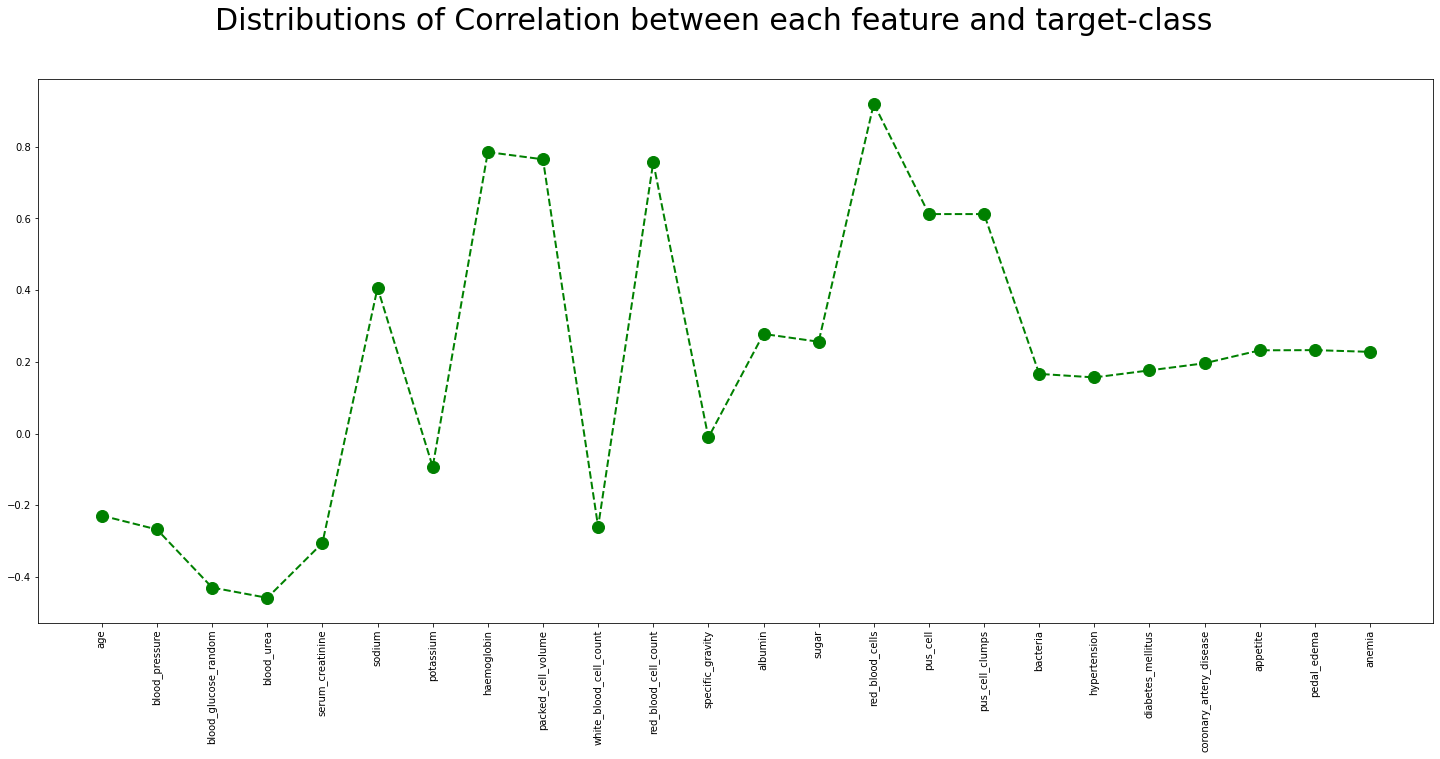

In [46]:
fig, ax = plt.subplots(figsize=(25,10))
_ = fig.suptitle('Distributions of Correlation between each feature and target-class', fontsize=30)

corr_24_list = corr_24.items()
x,y = zip(*corr_24_list)

plt.xticks(rotation=90)
plt.plot(x, y, 'go--', linewidth=2, markersize=12)
plt.show()

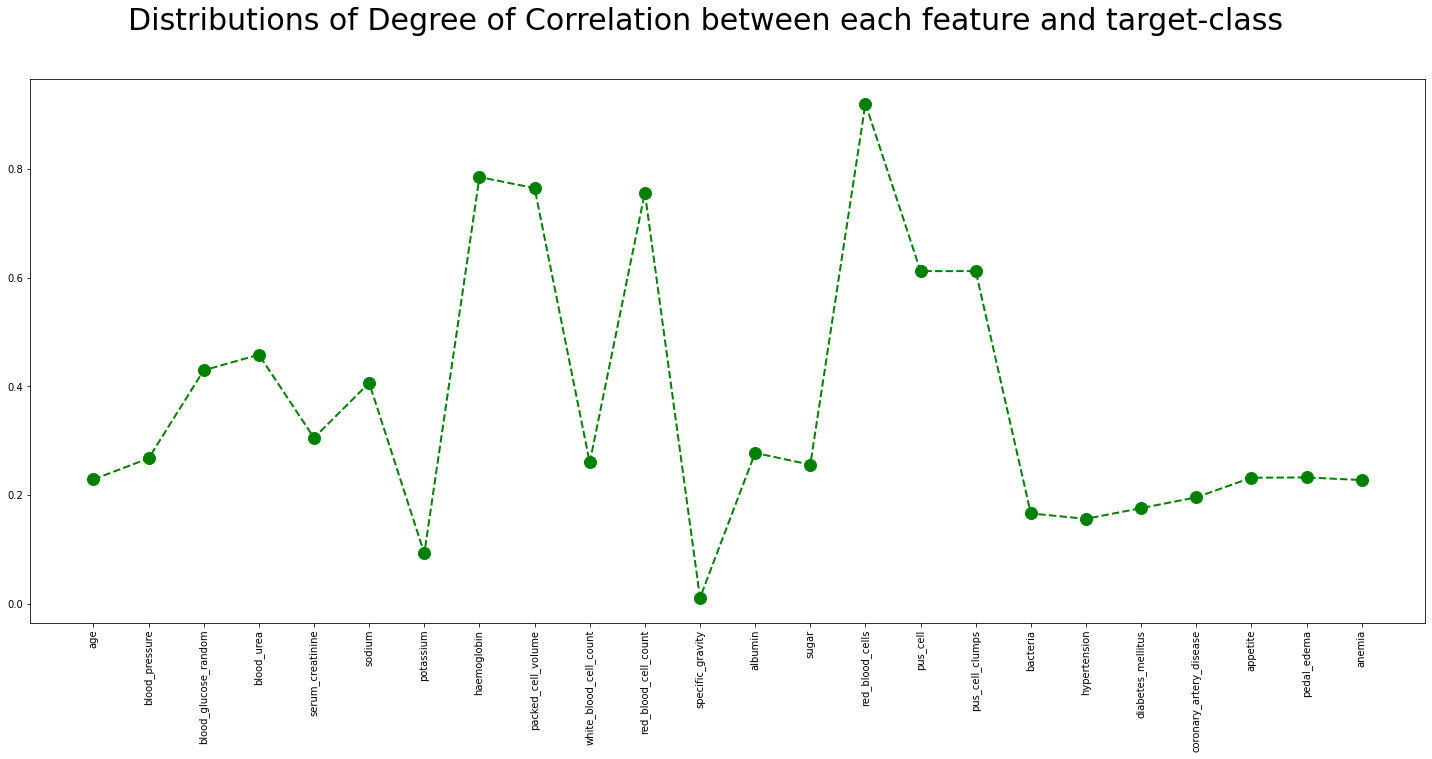

In [47]:
fig, ax = plt.subplots(figsize=(25,10))
_ = fig.suptitle('Distributions of Degree of Correlation between each feature and target-class', fontsize=30)

corr_24_list = corr_24.items()
x,y = zip(*corr_24_list)

y_list = list(y)
for f in range(len(y_list)):
    if (y_list[f] < 0):
        y_list[f] = y_list[f]*(-1)

plt.xticks(rotation=90)
plt.plot(x, y_list, 'go--', linewidth=2, markersize=12)
plt.show()

#### OBSERVATIONS:
- red_blood_cells, haemoglobin, packed_cell_volume and red_blood_cell_count are the top 4 contributors towards the target-class
- specific_gravity and potassium do not contribute significantly towards the target-class
- Following are the 9 top features that are influencing the target-class significatly and they must be considered into the dataset   
    1. red_blood_cells 
    2. haemoglobin
    3. packed_cell_volume
    4. red_blood_cell_count
    5. pus_cell
    6. pus_cell_clamps
    7. blood_urea
    8. blood_glucose_random
    9. sodium
    
    

#### Split the dataset across training and testing datasets  
1. We will keep 75% of the data for the training purpose
2. We will keep 25% of the data for the testing purpose


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2021)

### Model Building and Evaluation

In [49]:
def generate_roc_curves(model):
    ns_probs = [0 for _ in range(len(Y_test))]
    lr_probs = model.predict_proba(X_test)
    lr_probs = lr_probs[:, 1]
    ns_auc = roc_auc_score(Y_test, ns_probs)
    lr_auc = roc_auc_score(Y_test, lr_probs)

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Model: ROC AUC=%.3f' % (lr_auc))

    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='model')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()
    plt.show()

#### Lets apply the Logistic Regression algorithm

Logistic Regression Model Accuracy: 98.0
Logistic Regression Cross Validation Accuracy: 99.33 %
Logistic Regression Cross Validation Standard-Deviation: 1.33 %

No Skill: ROC AUC=0.500
Model: ROC AUC=1.000


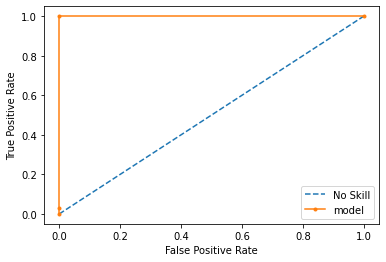

In [50]:
logistic_regression = LogisticRegression(random_state=2021)
_ = logistic_regression.fit(X_train, Y_train)
Y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

logistic_regression_model_accuracy = (100 * (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
print("Logistic Regression Model Accuracy:", logistic_regression_model_accuracy)

logistic_regression_cv_accuracies = cross_val_score(estimator = logistic_regression, 
                                                    X = X_train, 
                                                    y = Y_train, 
                                                    cv = 10, 
                                                    scoring = 'accuracy')

logistic_regression_cv_accuracies_mean = (logistic_regression_cv_accuracies.mean() * 100)
logistic_regression_cv_accuracies_std = (logistic_regression_cv_accuracies.std() * 100)

print("Logistic Regression Cross Validation Accuracy: {:.2f} %".format(logistic_regression_cv_accuracies_mean))
print("Logistic Regression Cross Validation Standard-Deviation: {:.2f} %".format(logistic_regression_cv_accuracies_std))
print()
generate_roc_curves(logistic_regression)

#### Lets apply the KNN algorithm

KNN Model Accuracy: 97.0
KNN Cross Validation Accuracy: 97.33 %
KNN Cross Validation Standard-Deviation: 2.49 %

No Skill: ROC AUC=0.500
Model: ROC AUC=1.000


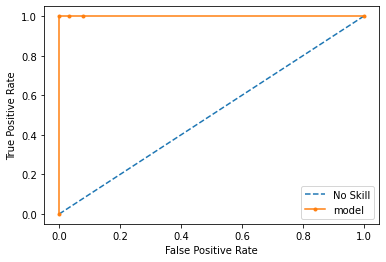

In [51]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
_ = knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

knn_model_accuracy = (100 * (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
print("KNN Model Accuracy:", knn_model_accuracy)

knn_cv_accuracies = cross_val_score(estimator = knn_classifier, 
                                    X = X_train, 
                                    y = Y_train, 
                                    cv = 10, 
                                    scoring = 'accuracy')

knn_cv_accuracies_mean = (knn_cv_accuracies.mean() * 100)
knn_cv_accuracies_std = (knn_cv_accuracies.std() * 100)

print("KNN Cross Validation Accuracy: {:.2f} %".format(knn_cv_accuracies_mean))
print("KNN Cross Validation Standard-Deviation: {:.2f} %".format(knn_cv_accuracies_std))
print()
generate_roc_curves(knn_classifier)

#### Lets apply the Decision Tree algorithm

Decision Tree Model Accuracy: 99.0
Decision Tree Cross Validation Accuracy: 98.67 %
Decision Tree Cross Validation Standard-Deviation: 2.21 %

No Skill: ROC AUC=0.500
Model: ROC AUC=0.992


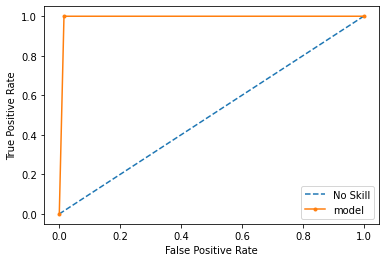

In [52]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, Y_train)
Y_pred = dt_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

dt_model_accuracy = (100 * (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
print("Decision Tree Model Accuracy:", dt_model_accuracy)

dt_cv_accuracies = cross_val_score(estimator = dt_classifier, 
                                    X = X_train, 
                                    y = Y_train, 
                                    cv = 10, 
                                    scoring = 'accuracy')

dt_cv_accuracies_mean = (dt_cv_accuracies.mean() * 100)
dt_cv_accuracies_std = (dt_cv_accuracies.std() * 100)

print("Decision Tree Cross Validation Accuracy: {:.2f} %".format(dt_cv_accuracies_mean))
print("Decision Tree Cross Validation Standard-Deviation: {:.2f} %".format(dt_cv_accuracies_std))
print()
generate_roc_curves(dt_classifier)

#### Lets apply the Random Forest algorithm

Random Forest Model Accuracy: 100.0
Random Forest Cross Validation Accuracy: 99.67 %
Random Forest Cross Validation Standard-Deviation: 1.00 %

No Skill: ROC AUC=0.500
Model: ROC AUC=1.000


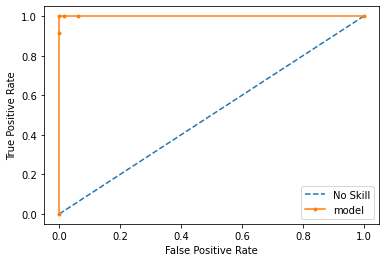

In [53]:
rn_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rn_classifier.fit(X_train, Y_train)
Y_pred = rn_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

rn_model_accuracy = (100 * (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
print("Random Forest Model Accuracy:", rn_model_accuracy)

rn_cv_accuracies = cross_val_score(estimator = rn_classifier, 
                                    X = X_train, 
                                    y = Y_train, 
                                    cv = 10, 
                                    scoring = 'accuracy')

rn_cv_accuracies_mean = (rn_cv_accuracies.mean() * 100)
rn_cv_accuracies_std = (rn_cv_accuracies.std() * 100)

print("Random Forest Cross Validation Accuracy: {:.2f} %".format(rn_cv_accuracies_mean))
print("Random Forest Cross Validation Standard-Deviation: {:.2f} %".format(rn_cv_accuracies_std))
print()
generate_roc_curves(rn_classifier)

#### Conclusion on Baseline Models:
Based on the evaluation of the 4 models that we have built for our dataset, we can conclude the following things:
1. Random Forest gives the best model accuracy of 100.0
2. Also, Random Forest has the best CV accuracy mean and std values.
3. KNN performs the worst with the given dataset having model accuracy.

### Model Enhancement
Based on our last conclusion, we can proceed with the model created through the Random Forest.  
We can now try to enhance the model accuracy by performing the Principal Component Analysis (PCA) on the dataset.

In [54]:
X_train_pca = X_train
max_accuracy = 0
max_std = 0

# there are 48 attributes in our training and testing dataset
# the original dataset contains only 24 independent features and 1 target-variable
rn_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

for f in range(2, 48):
    X_train_tmp = X_train_pca
    pca = PCA(n_components = f)
    X_train_tmp = pca.fit_transform(X_train_tmp)
    
    rn_classifier.fit(X_train_tmp, Y_train)
  
    accuracies = cross_val_score(estimator = rn_classifier, X = X_train_tmp, y = Y_train, cv = 10)
    accuracy = (accuracies.mean() * 100)
    std = (accuracies.std() * 100)
    
    print("For {} features".format(f), "Acc:", accuracy, " Std:", std)
    
    if (accuracy > max_accuracy):
        max_accuracy = accuracy
        model = rn_classifier
        max_std = std
        no_of_features = f


For 2 features Acc: 98.00000000000001  Std: 2.2110831935702664
For 3 features Acc: 98.33333333333334  Std: 1.6666666666666663
For 4 features Acc: 99.66666666666667  Std: 0.9999999999999999
For 5 features Acc: 99.0  Std: 1.5275252316519463
For 6 features Acc: 99.66666666666667  Std: 0.9999999999999999
For 7 features Acc: 99.33333333333334  Std: 1.333333333333333
For 8 features Acc: 99.33333333333334  Std: 1.333333333333333
For 9 features Acc: 99.0  Std: 1.5275252316519463
For 10 features Acc: 99.0  Std: 1.5275252316519463
For 11 features Acc: 98.33333333333334  Std: 1.6666666666666663
For 12 features Acc: 99.0  Std: 1.5275252316519463
For 13 features Acc: 98.66666666666667  Std: 1.6329931618554516
For 14 features Acc: 99.0  Std: 1.5275252316519463
For 15 features Acc: 98.33333333333334  Std: 2.2360679774997894
For 16 features Acc: 99.66666666666667  Std: 0.9999999999999999
For 17 features Acc: 100.0  Std: 0.0
For 18 features Acc: 99.33333333333334  Std: 1.333333333333333
For 19 features

#### OBSERVATIONS:
Since the model having 17 and 26 features through PCA gives the 100% accuracy.  
So this indicates that all the 48 attributes are contributing (if not equally or substantially) towards the final classification

In [55]:
print("Maximum accuracy is observed for {} features".format(no_of_features))
print("Accuracy: {}". format(max_accuracy))
print("Standard deviation: {}".format(max_std))

Maximum accuracy is observed for 17 features
Accuracy: 100.0
Standard deviation: 0.0


### Final Conclusion
- We have a model which has achieved an accuracy of 100%
- So this indicates that no feature or attribute should be dropped from the dataset, as all of them are contributing uniquely towards the classification.

- The final model (rn_classifier) provides a more reliable model to determine if a patient is suffering from chronic kidney disease or not.
- Following are the 9 top features that are influencing the target-class significatly and they must be considered into the dataset   
    1. red_blood_cells 
    2. haemoglobin
    3. packed_cell_volume
    4. red_blood_cell_count
    5. pus_cell
    6. pus_cell_clamps
    7. blood_urea
    8. blood_glucose_random
    9. sodium
    
    

### THE END